In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.io as scio
import statsmodels.formula.api as smf
from linearmodels.panel.results import compare
from matplotlib.font_manager import FontProperties

font_path = r'C:\Windows\Fonts\simsun.ttc'
chinese_font = FontProperties(fname=r'C:\Windows\Fonts\simsun.ttc')
english_font = FontProperties(fname=r'C:\Windows\Fonts\arial.ttf')

# 定义索引
rural = np.arange(0, 60, 2)
urban = np.arange(1, 60, 2)
east = np.r_[0, 1, 2, 3, 4, 5, 16, 17, 18, 19, 20, 21, 24, 25, 28, 29, 36, 37, 40, 41]
middle = np.r_[6, 7, 22, 23, 26, 27, 30, 31, 32, 33, 34, 35]
west = np.r_[8, 9, 10, 11, 12, 13, 14, 15, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]

In [2]:
# 读取基准情形的变量和参数
equilibrium2010 = np.load('./data/equilibrium2010.npz')
R = equilibrium2010['R']
X = equilibrium2010['X']
m = equilibrium2010['m']
pi = equilibrium2010['pi']
L = equilibrium2010['L']
L_bar = equilibrium2010['L_bar']
K = equilibrium2010['K']
w = equilibrium2010['w']
P = equilibrium2010['P']
W = equilibrium2010['W']

parameter = np.load('./data/Parameter.npz')
kappa = parameter['kappa']
theta = parameter['theta']
beta = parameter['beta']
psi_ag = parameter['psi_ag']
psi_na = parameter['psi_na']
alpha_ag = parameter['alpha_ag']
alpha_na = parameter['alpha_na']
sigma_ag = parameter['sigma_ag']
sigma_na = parameter['sigma_na']
eta_ag_ag = parameter['eta_ag_ag']
eta_ag_na = parameter['eta_ag_na']
eta_na_ag = parameter['eta_na_ag']
eta_na_na = parameter['eta_na_na']
phiu = parameter['phiu']
phip = parameter['phip']
chi = parameter['chi']
eta = parameter['eta']
delta = parameter['delta']
xi_ag = parameter['xi_ag']
xi_na = parameter['xi_na']
t = parameter['t']

In [3]:
# 导入内生变量的反事实变动
counterfactuals = np.load('./data/Counterfactuals2010.npz')

dw = counterfactuals['dw']
dL = counterfactuals['dL']
dp = counterfactuals['dp']
dG = counterfactuals['dG']
dc = counterfactuals['dc']
dpi = counterfactuals['dpi']
pi_prime = counterfactuals['pi_prime']
dP = counterfactuals['dP']
dW = counterfactuals['dW']
dmu = counterfactuals['dmu']
dm = counterfactuals['dm']
m_prime = counterfactuals['m_prime']
R_prime = counterfactuals['R_prime']
X_prime = counterfactuals['X_prime']
ddelta = counterfactuals['ddelta']
drh = counterfactuals['drh']

coef_rhKh_ag = (1 - beta) * (1 - t) * (alpha_ag + sigma_ag) / beta / alpha_ag
coef_rhKh_na = (1 - beta) * (1 - t)

w_prime = w * dw
L_prime = L * dL
W_prime = W * dW
P_prime = P * dP
dg = dG / (dL ** chi)
rhKh = ((w * L).reshape([30, 2]) * np.array([coef_rhKh_ag, coef_rhKh_na]).reshape([1, 2])).reshape([60, 1])
rhKh_prime = rhKh * dw * dL

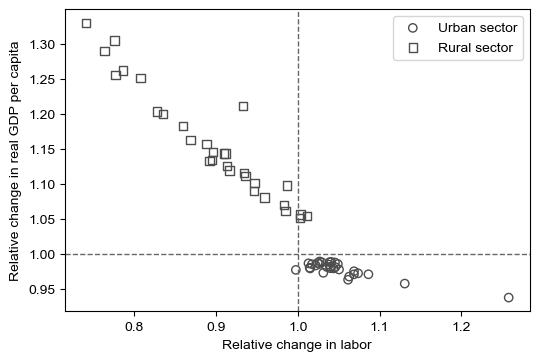

In [8]:
fig, ax = plt.subplots(dpi=100)
ax.scatter(dL[urban], (dW)[urban], marker='o', label='Urban sector', facecolors='none', edgecolors='0.3')
ax.scatter(dL[rural], (dW)[rural], marker='s', label='Rural sector', facecolors='none', edgecolors='0.3')
ax.set_xlabel('Relative change in labor', fontproperties=english_font)
ax.set_ylabel('Relative change in real GDP per capita', fontproperties=english_font)
ax.axvline(1, color='0.4', linestyle='--', linewidth=1)
ax.axhline(1, color='0.4', linestyle='--', linewidth=1)

plt.legend(prop=english_font)
for tick in ax.get_xticklabels() + ax.get_yticklabels():
    tick.set_fontproperties(english_font)
plt.show()